In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Fraud_Loan.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
data["Gender"].fillna( method ='ffill', inplace = True) 
  

In [5]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data["Married"].fillna( method ='ffill', inplace = True)

In [7]:
data["Dependents"].fillna( method ='ffill', inplace = True)

In [8]:
data["Self_Employed"].fillna( method ='ffill', inplace = True)

In [10]:
data["Loan_Amount_Term"].fillna( method ='ffill', inplace = True)

In [11]:
data["Credit_History"].fillna( method ='ffill', inplace = True)

In [12]:
data['LoanAmount'].fillna((data['LoanAmount'].mean()), inplace=True)

In [13]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

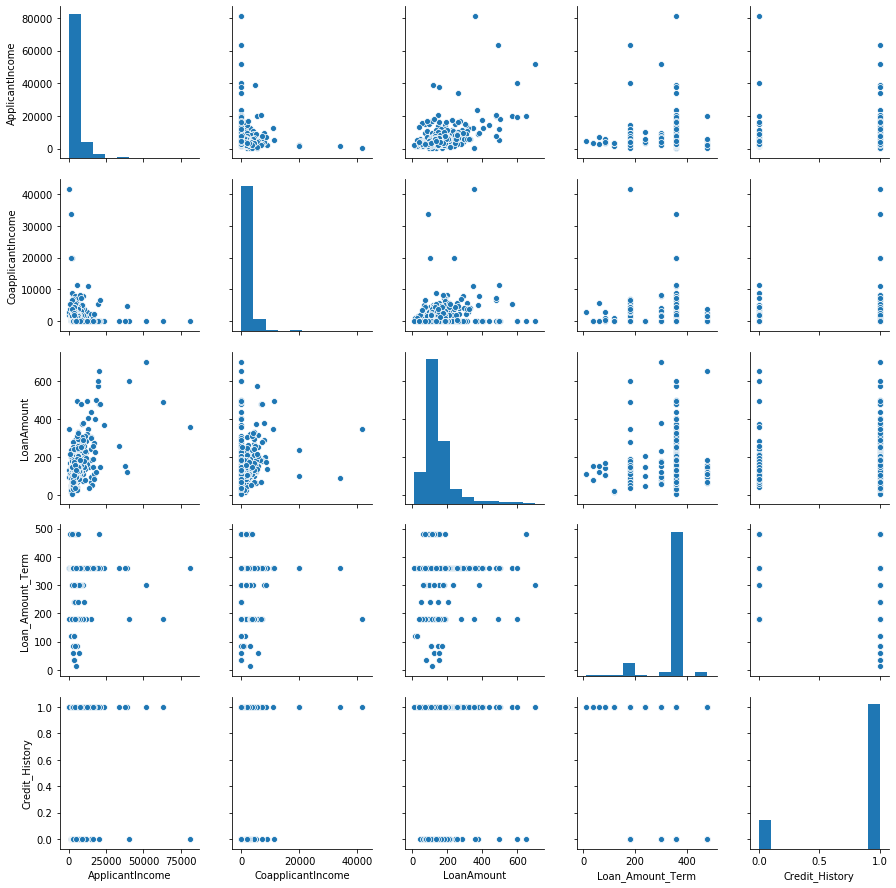

In [16]:
sns.pairplot(data)

In [17]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.042849,-0.020183
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.067336,0.009391
LoanAmount,0.565620,0.187828,1.000000,0.039488,-0.018836
Loan_Amount_Term,-0.042849,-0.067336,0.039488,1.000000,-0.031843
Credit_History,-0.020183,0.009391,-0.018836,-0.031843,1.000000


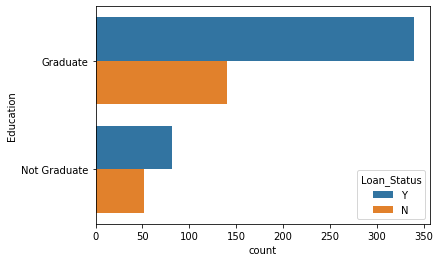

In [19]:
sns.countplot(y='Education', hue='Loan_Status', data=data)

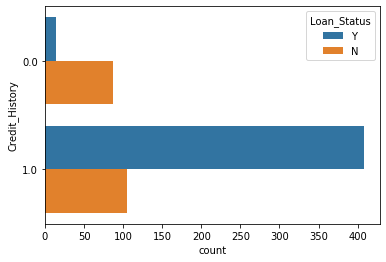

In [20]:
sns.countplot(y='Credit_History', hue='Loan_Status', data=data)

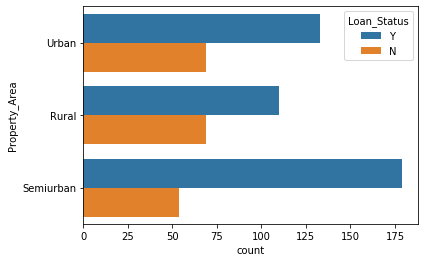

In [23]:
sns.countplot(y='Property_Area', hue='Loan_Status', data=data)

In [24]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.293829
Credit_History      -1.814433
dtype: float64

In [25]:
#copy numerical data
data_uc = data[['ApplicantIncome','CoapplicantIncome','LoanAmount', 
                       'Loan_Amount_Term', 'Credit_History']].copy()
data_uc.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


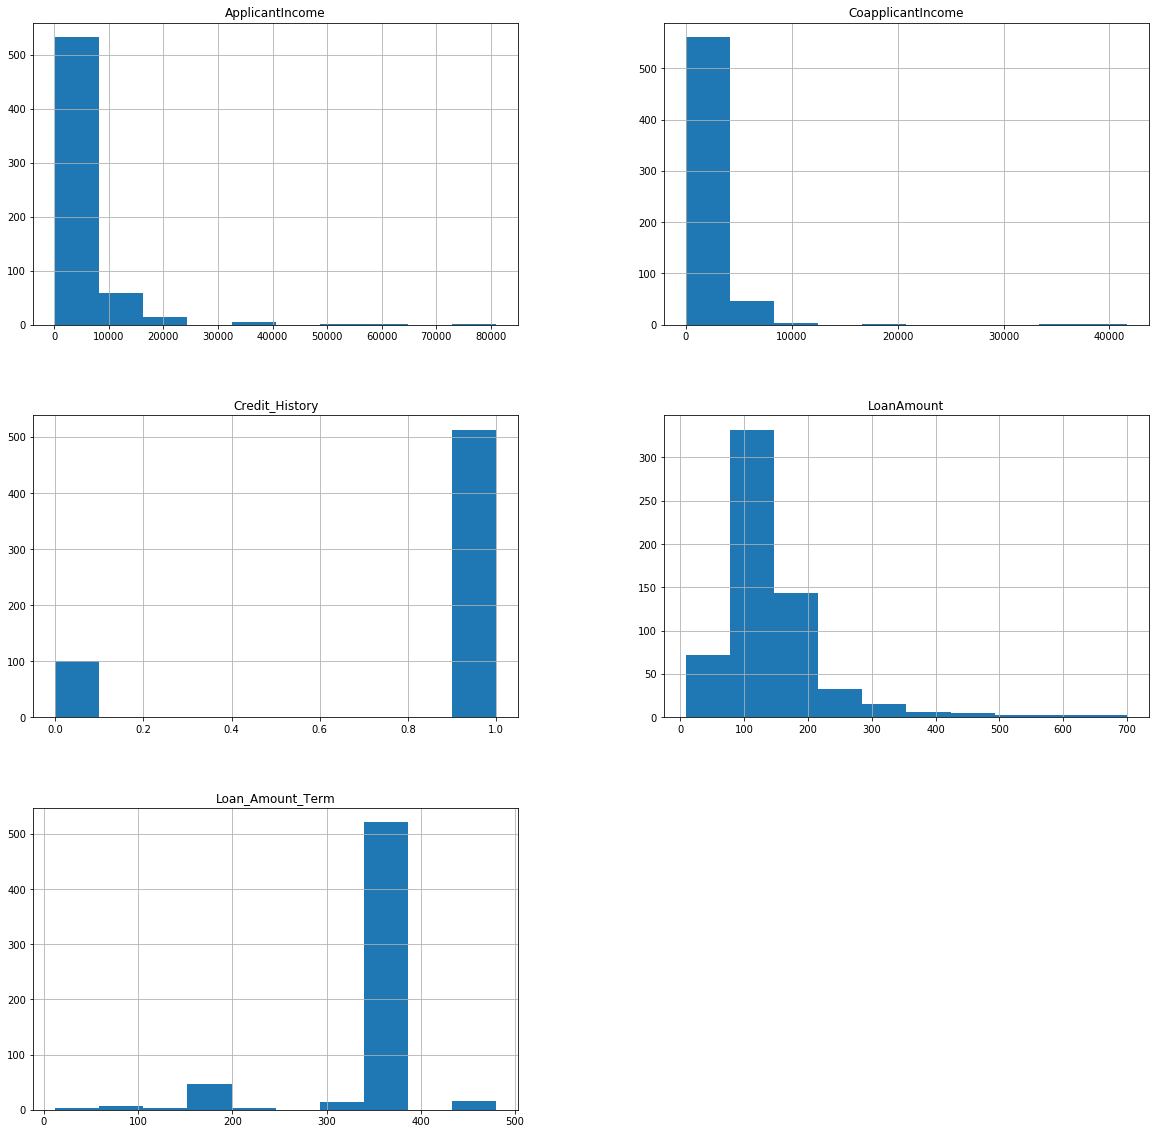

In [26]:
data_uc.hist(figsize=(20,20))
plt.show()

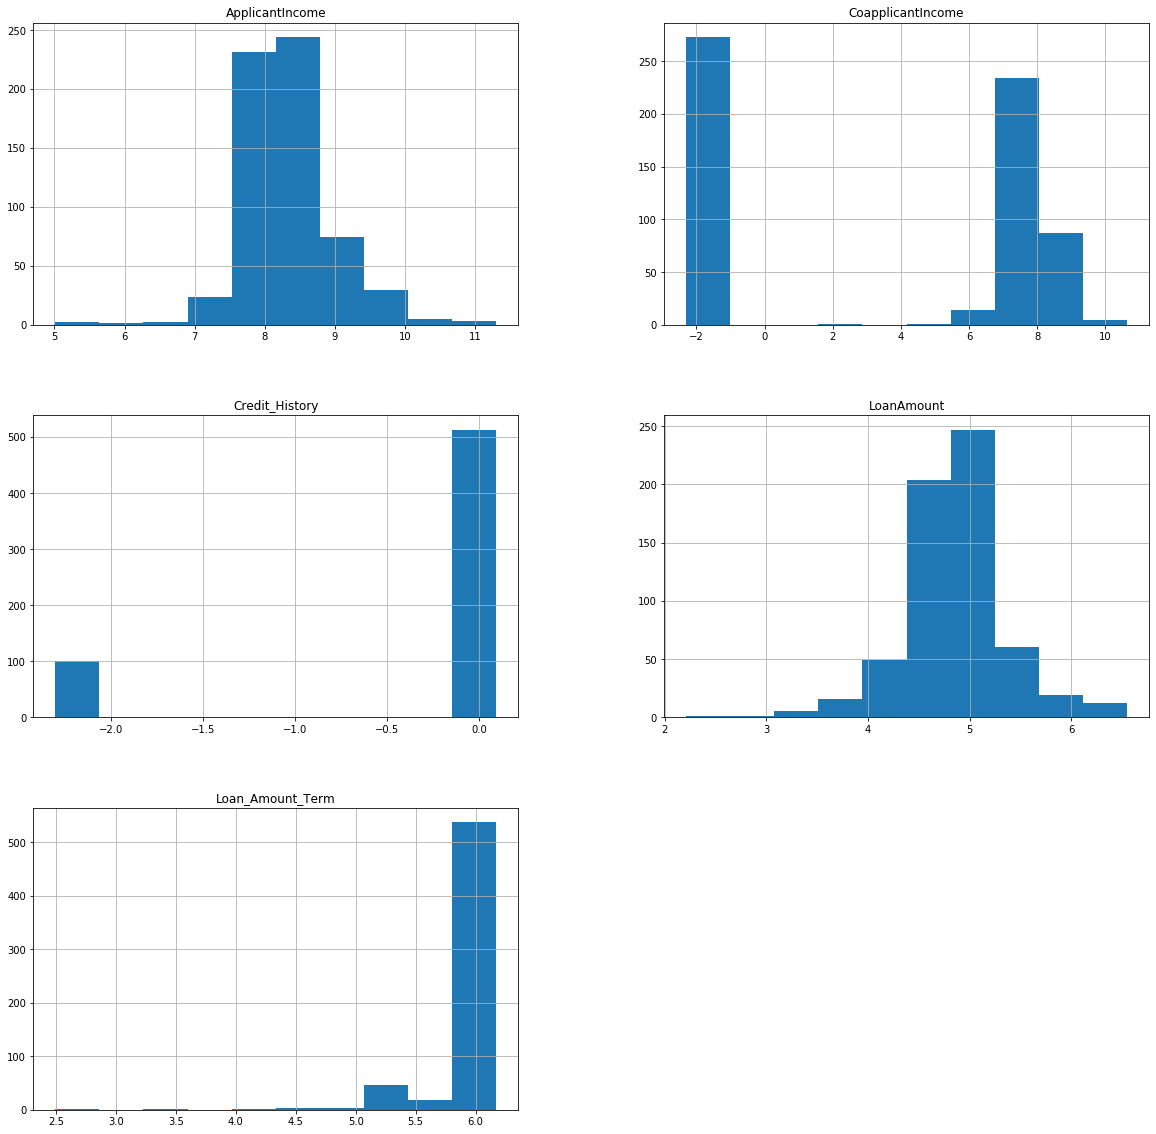

In [27]:
data_uc_log=np.log(data_uc+0.1)
data_uc_log.hist(figsize=(20,20))
plt.show()

In [42]:
#copy categorical data
data_cat = data[['Gender','Married','Dependents', 
                       'Education', 'Self_Employed','Property_Area']].copy()
data_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [43]:
data_cat1 = pd.get_dummies(data_cat)
data_cat1.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [44]:
data_final = pd.concat([data_uc, data_cat1], axis=1)
data_final

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [45]:
df_x= data_final
df_x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [47]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import pandas as pd
le=LabelEncoder()
data['Loan_Status']=le.fit_transform(data['Loan_Status'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [48]:
y=data["Loan_Status"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [49]:
#sacaling down using standardscaler
from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler(feature_range=(0, 5))
x=MS.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.352443,0.000000,0.994299,3.717949,5.0,0.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0
1,0.274150,0.180959,0.861071,3.717949,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0
2,0.176252,0.000000,0.412446,3.717949,5.0,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0
3,0.150464,0.282958,0.803184,3.717949,5.0,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0
4,0.361781,0.000000,0.955137,3.717949,5.0,0.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.170068,0.000000,0.448625,3.717949,5.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0
610,0.244651,0.000000,0.224313,1.794872,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0
611,0.489920,0.028800,1.765557,3.717949,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0
612,0.459678,0.000000,1.287988,3.717949,5.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss,accuracy_score,confusion_matrix,classification_report

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [54]:
model=[LogisticRegression(),SVC(),GaussianNB(),MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('roc_auc_score',m,'is')
    print('Accuracy score of',m,'is')
    print(roc_auc_score(y_test,predm))
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

roc_auc_score LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is
Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is
0.721181001283697
0.8235294117647058
[[19 22]
 [ 2 93]]
              precision    recall  f1-score   support

           0       0.90      0.46      0.61        41
           1       0.81      0.98      0.89        95

    accuracy                           0.82       136
   macro avg       0.86      0.72     

In [55]:
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.81451613 0.75       0.78688525 0.86065574 0.81967213]
0.8063458487572713 0.03673547891427221


In [56]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier()
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.80645161 0.70967742 0.7704918  0.76229508 0.79508197]
0.768799576943416 0.03361262100164569


In [58]:
from sklearn.model_selection import KFold
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=5)

log_grid = log_gs.fit(x_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)

best params: LogisticRegression(C=0.030999999999999996, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.030999999999999996}
best score: 0.7827516052580163


Text(0.5, 257.44, 'Predicted label')

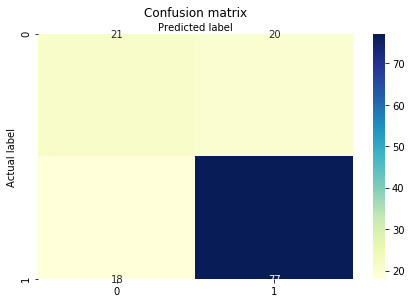

In [62]:
#Evaluation
## Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(x_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(x_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 72.06


In [64]:
log_opt.fit(x_train, y_train)
print(classification_report(y_test, log_opt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.54      0.51      0.53        41
           1       0.79      0.81      0.80        95

    accuracy                           0.72       136
   macro avg       0.67      0.66      0.66       136
weighted avg       0.72      0.72      0.72       136



In [65]:
log_opt.fit(x_train, y_train) # fit optimised model to the training data
probality = log_opt.predict_proba(x_test) # predict probabilities
probality = probality[:, 1] # we will only keep probabilities associated with the 
logit_roc_auc = roc_auc_score(y_test, probality) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)
#slight increase in AUC score

AUC score: 0.719


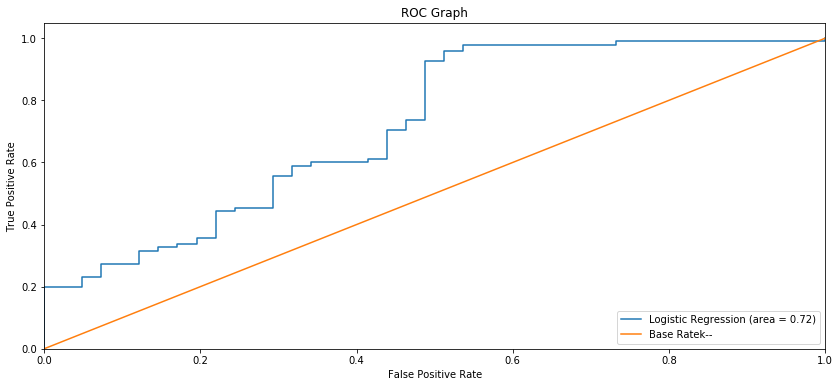

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(x_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [67]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)

best params: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=8, min_weight_fraction_leaf=0.0,
                       n_estimators=175, n_jobs=None, oob_score=False,
                       random_state=7, verbose=0, warm_start=False)
best params: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 175}
best score: 0.7799064124508683


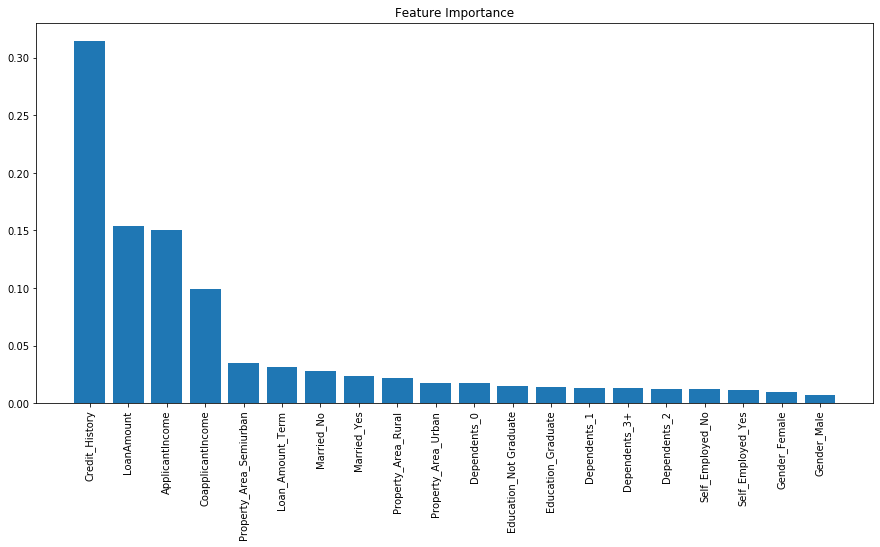

In [68]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [x_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(x_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(x_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()
#credit history palys vital role foolowed by loanamount to detect fraud defaulters

Text(0.5, 257.44, 'Predicted label')

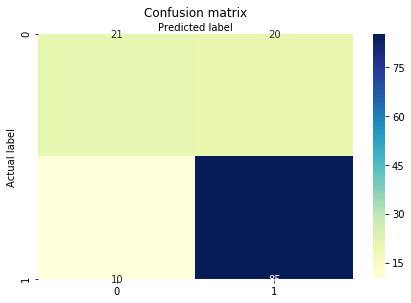

In [69]:

## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(x_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(x_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 77.94


In [71]:
# Classification report for the optimised RF Regression
rf_opt.fit(x_train, y_train)
print(classification_report(y_test, rf_opt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.68      0.51      0.58        41
           1       0.81      0.89      0.85        95

    accuracy                           0.78       136
   macro avg       0.74      0.70      0.72       136
weighted avg       0.77      0.78      0.77       136



In [72]:
rf_opt.fit(x_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(x_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)
#increase of _auc_roc score from 0.58 to 0.773 good improvement

AUC score: 0.751


In [74]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(20):
    feat = x_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,Credit_History,0.314868
1,LoanAmount,0.154116
2,ApplicantIncome,0.150201
3,CoapplicantIncome,0.099461
4,Property_Area_Semiurban,0.034503
5,Loan_Amount_Term,0.031013
6,Married_No,0.027515
7,Married_Yes,0.023150
8,Property_Area_Rural,0.022068
9,Property_Area_Urban,0.017818


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x,y)
grid.best_params_

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 10, 'weights': 'distance'}

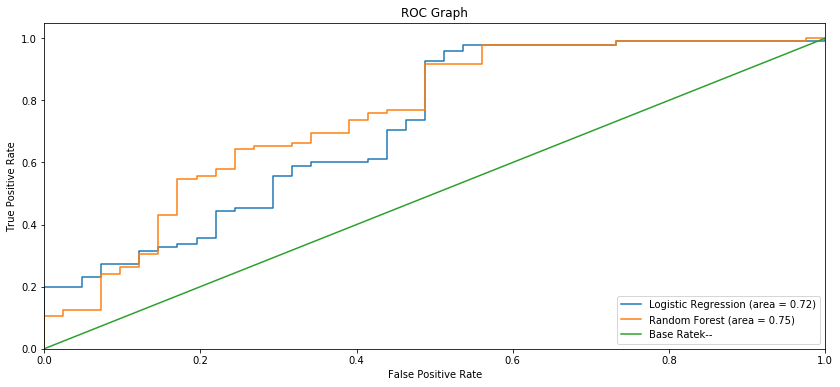

In [84]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(x_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# both Random forest and Logistic regression can be chosen as evaluaters as ROC score is almost same with Random forest Having slightedge